In [1]:
#basic
import numpy as np
import pandas as pd
import os

#plot
import seaborn as sns
import matplotlib.pyplot as plt

#model training
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Integer

#regressors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 1.Import Dataset

In [2]:
user = os.getlogin()
print(user)

Yushu gong


In [3]:
if user == 'Yushu gong':
    df = pd.read_csv("C:\\Users\\Yushu gong\\Desktop\\Albert School\\ML-SL\\Final-Project\\company_esg_financial_dataset.csv")
else:
    df = pd.read_csv("/Users/vivianhung/Documents/git_project/Machine-Learning-Project/data/company_esg_financial_dataset.csv")

In [4]:
df.head(10)

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
5,1,Company_1,Retail,Latin America,2020,567.5,6.0,384.1,2.3,55.7,65.1,28.5,73.5,42245.4,21122.7,84490.9
6,1,Company_1,Retail,Latin America,2021,604.2,5.2,479.3,6.5,55.6,66.8,25.5,74.6,44263.8,22131.9,88527.7
7,1,Company_1,Retail,Latin America,2022,593.2,4.2,248.4,-1.8,57.7,69.0,27.1,76.9,42536.3,21268.2,85072.6
8,1,Company_1,Retail,Latin America,2023,636.7,5.3,373.9,7.3,57.8,68.3,27.0,78.1,45956.3,22978.2,91912.6
9,1,Company_1,Retail,Latin America,2024,687.0,4.6,460.1,7.9,58.5,68.9,29.9,76.8,49289.1,24644.5,98578.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [6]:
print(df['Year'].nunique())
print(df['CompanyID'].nunique())

11
1000


In [7]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [8]:
df.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

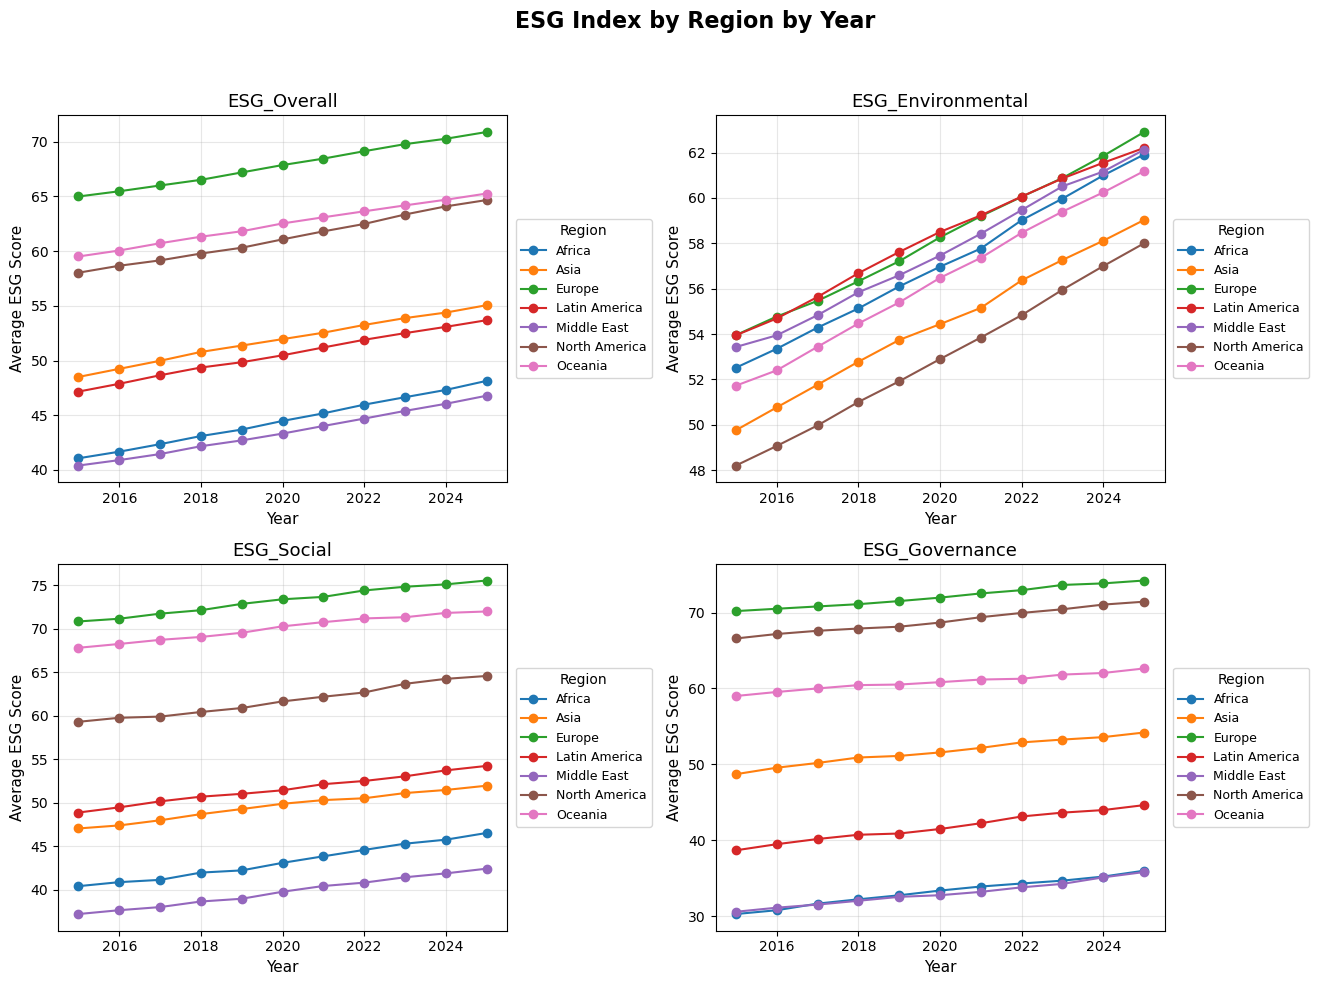

In [9]:
# ESG columns to plot
esg_columns = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(esg_columns):
    ax = axes[i]
    df_avg = df.groupby(['Year', 'Region'])[col].mean().reset_index()

    # Plot each industry's trend
    for industry in df_avg['Region'].unique():
        data = df_avg[df_avg['Region'] == industry]
        ax.plot(data['Year'], data[col], marker='o', label=industry)

    # Titles and labels
    ax.set_title(f'{col}', fontsize=13)
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Average ESG Score', fontsize=11)
    ax.grid(True, alpha=0.3)

    # Legend outside each subplot on the right
    ax.legend(
        title='Region',
        bbox_to_anchor=(1.02, 0.5),
        loc='center left',
        borderaxespad=0.,
        fontsize=9,
        title_fontsize=10
    )

# Add a single main title for the entire figure
fig.suptitle('ESG Index by Region by Year', fontsize=16, fontweight='bold')

# Adjust layout to leave space for the main title and legends
plt.tight_layout(rect=[0, 0, 0.95, 0.95])

plt.show()

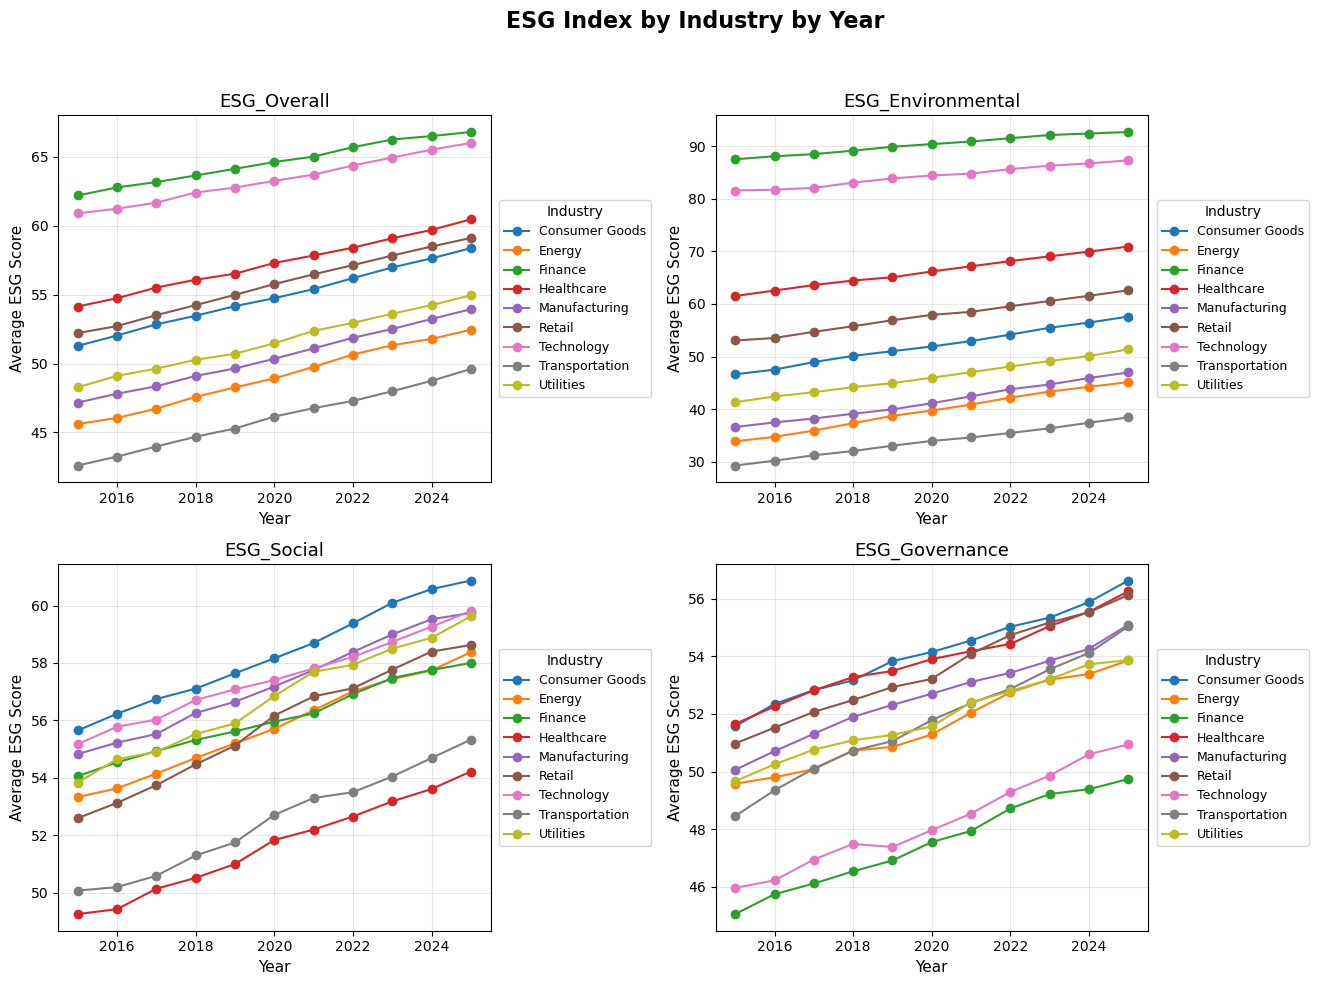

In [11]:
# ESG columns to plot
esg_columns = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(esg_columns):
    ax = axes[i]
    df_avg = df.groupby(['Year', 'Industry'])[col].mean().reset_index()

    # Plot each industry's trend
    for industry in df_avg['Industry'].unique():
        data = df_avg[df_avg['Industry'] == industry]
        ax.plot(data['Year'], data[col], marker='o', label=industry)

    # Titles and labels
    ax.set_title(f'{col}', fontsize=13)
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Average ESG Score', fontsize=11)
    ax.grid(True, alpha=0.3)

    # Legend outside each subplot on the right
    ax.legend(
        title='Industry',
        bbox_to_anchor=(1.02, 0.5),
        loc='center left',
        borderaxespad=0.,
        fontsize=9,
        title_fontsize=10
    )

# Add a single main title for the entire figure
fig.suptitle('ESG Index by Industry by Year', fontsize=16, fontweight='bold')

# Adjust layout to leave space for the main title and legends
plt.tight_layout(rect=[0, 0, 0.95, 0.95])

plt.show()

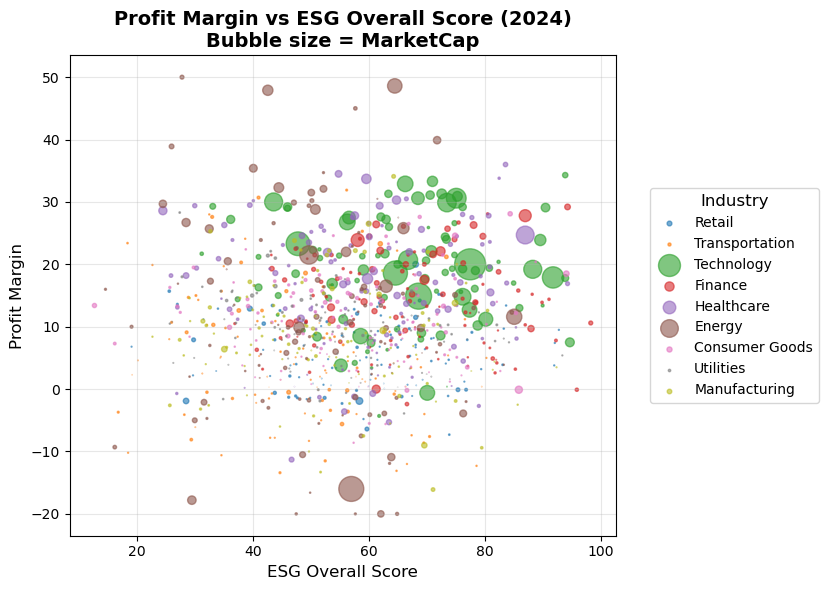

In [12]:
# Filter data for 2024
df_2024 = df[df['Year'] == 2024]

# Normalize bubble size for better visualization
size_scale = 500  # Adjust this to change bubble sizes
sizes = df_2024['MarketCap'] / df_2024['MarketCap'].max() * size_scale

# Create bubble chart
plt.figure(figsize=(10, 6))
for industry in df_2024['Industry'].unique():
    data = df_2024[df_2024['Industry'] == industry]
    plt.scatter(
        data['ESG_Overall'],
        data['ProfitMargin'],
        s=data['MarketCap'] / df_2024['MarketCap'].max() * size_scale,  # bubble size
        alpha=0.6,
        label=industry
    )

# Labels and title
plt.xlabel('ESG Overall Score', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin vs ESG Overall Score (2024)\nBubble size = MarketCap', fontsize=14, fontweight='bold')

# Legend outside on the right
plt.legend(
    title='Industry',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    fontsize=10,
    title_fontsize=12
)

plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

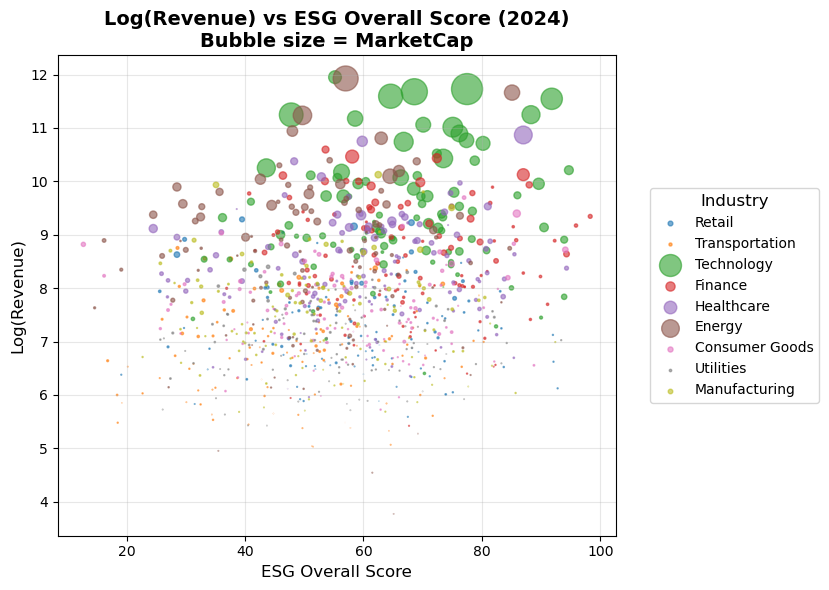

In [13]:
# Filter data for 2024
df_2024 = df[df['Year'] == 2024]

# Normalize bubble size
size_scale = 500  # Adjust this to change bubble sizes

plt.figure(figsize=(10, 6))
for industry in df_2024['Industry'].unique():
    data = df_2024[df_2024['Industry'] == industry]
    plt.scatter(
        data['ESG_Overall'],
        np.log1p(data['Revenue']),  # 将 Revenue 做 log1p 变换
        s=data['MarketCap'] / df_2024['MarketCap'].max() * size_scale,
        alpha=0.6,
        label=industry
    )

# Labels and title
plt.xlabel('ESG Overall Score', fontsize=12)
plt.ylabel('Log(Revenue)', fontsize=12)  # 改 Y 轴标签
plt.title('Log(Revenue) vs ESG Overall Score (2024)\nBubble size = MarketCap', fontsize=14, fontweight='bold')

# Legend outside on the right
plt.legend(
    title='Industry',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    fontsize=10,
    title_fontsize=12
)

plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


Select 2023-2024 dataset

In [14]:
# Filter data from df where the Year is 2023 or 2024.
df_2023_2024 = df[df['Year'].isin([2023, 2024])].copy()

In [15]:
# Sort by company and year
df_2023_2024 = df_2023_2024.sort_values(by=['CompanyID', 'Year'])

# Columns for which to calculate YoY change
cols_to_diff = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# Compute YoY differences for each company
for col in cols_to_diff:
    df_2023_2024[f'{col}_YoY'] = df_2023_2024.groupby('CompanyID')[col].diff()

# Keep only 2024 rows
df_final = df_2023_2024[df_2023_2024['Year'] == 2024].copy()

# Display results
print(df_final.shape)
print(df_final.columns)
df_final.head(10)

(1000, 26)
Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption', 'Revenue_YoY', 'MarketCap_YoY',
       'GrowthRate_YoY', 'ESG_Overall_YoY', 'ESG_Environmental_YoY',
       'ESG_Social_YoY', 'ESG_Governance_YoY', 'CarbonEmissions_YoY',
       'WaterUsage_YoY', 'EnergyConsumption_YoY'],
      dtype='object')


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,...,Revenue_YoY,MarketCap_YoY,GrowthRate_YoY,ESG_Overall_YoY,ESG_Environmental_YoY,ESG_Social_YoY,ESG_Governance_YoY,CarbonEmissions_YoY,WaterUsage_YoY,EnergyConsumption_YoY
9,1,Company_1,Retail,Latin America,2024,687.0,4.6,460.1,7.9,58.5,...,50.3,86.2,0.6,0.7,0.6,2.9,-1.3,3332.8,1666.3,6665.5
20,2,Company_2,Retail,Asia,2024,3822.9,-1.2,5807.8,3.6,65.7,...,131.3,3284.6,-15.2,-0.3,-1.2,1.4,-1.3,12644.9,6322.4,25289.7
31,3,Company_3,Transportation,Latin America,2024,438.0,10.3,739.4,5.5,32.1,...,22.8,240.7,-1.1,-0.2,3.2,-2.3,-1.4,8729.7,1454.9,29099.1
42,4,Company_4,Technology,Africa,2024,6555.1,26.0,45451.6,12.2,63.5,...,710.9,10670.0,9.9,0.9,0.0,0.7,1.8,17773.5,10664.1,35547.1
53,5,Company_5,Finance,Middle East,2024,3282.1,22.5,9663.0,0.0,47.4,...,0.4,3221.2,-6.1,1.5,3.9,-0.1,0.5,-1809.4,-904.7,-4523.7
64,6,Company_6,Transportation,Oceania,2024,3095.6,-8.6,2201.1,2.9,69.5,...,86.1,-2708.9,-6.6,-2.2,-5.9,0.0,-0.5,114805.1,19134.2,382683.6
75,7,Company_7,Healthcare,Oceania,2024,6084.6,-3.6,27425.5,1.2,55.8,...,69.8,17130.7,7.0,2.1,0.3,3.9,2.3,3121.4,3121.4,6242.9
86,8,Company_8,Healthcare,Europe,2024,7168.5,13.7,17539.0,5.3,81.4,...,358.1,7673.0,1.9,1.8,2.8,-0.2,2.9,10304.0,10304.0,20608.0
97,9,Company_9,Technology,North America,2024,5853.9,6.3,5804.7,14.7,63.2,...,751.8,582.7,5.5,-0.1,0.6,1.1,-1.9,32001.6,19200.9,64003.1
108,10,Company_10,Technology,Latin America,2024,117939.2,14.9,610070.0,9.2,68.6,...,9910.1,193088.0,-6.3,1.2,-1.7,0.3,5.1,387786.7,232672.0,775573.4


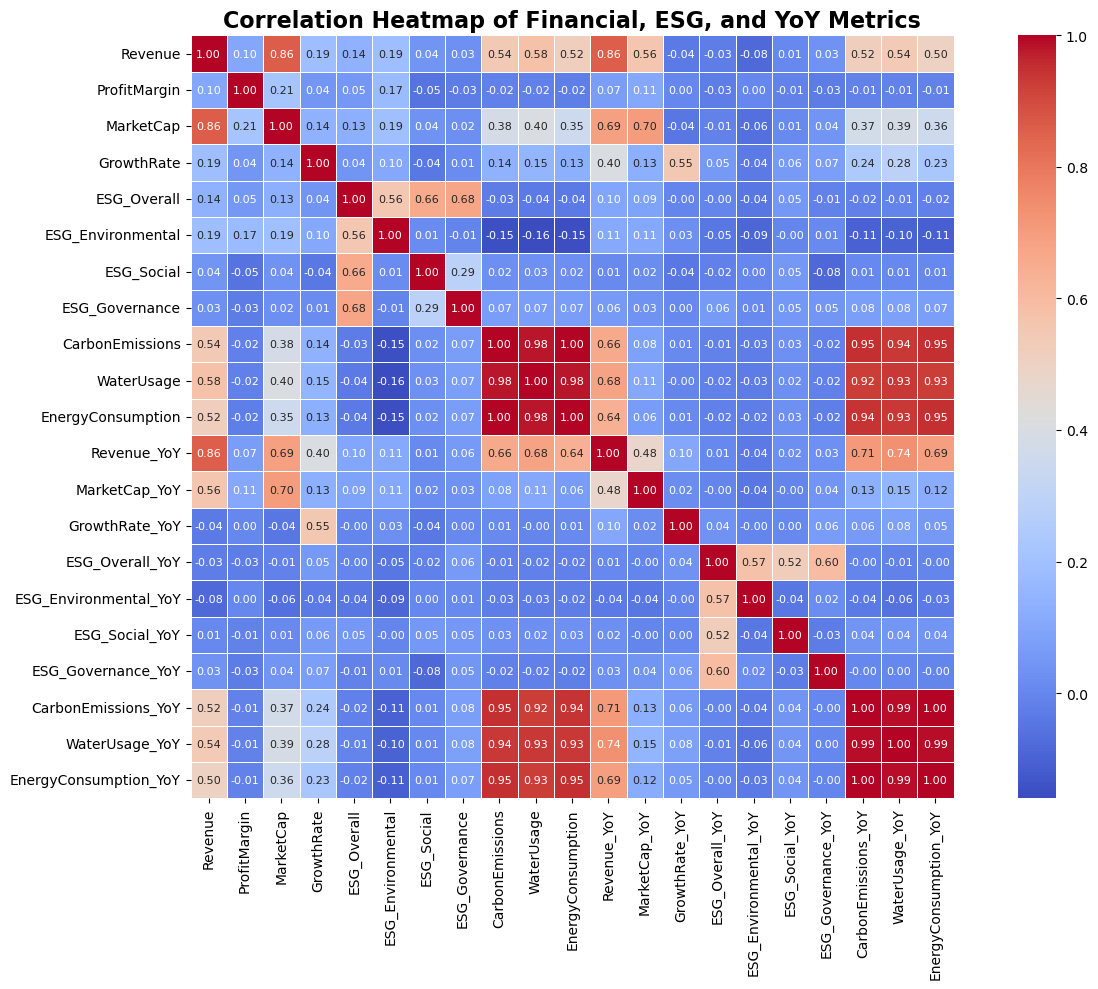

In [16]:
# Select only numeric columns that make sense for correlation
numeric_cols = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY',
    'ESG_Governance_YoY', 'CarbonEmissions_YoY', 'WaterUsage_YoY',
    'EnergyConsumption_YoY'
]

# Compute correlation matrix
corr = df_final[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={'size': 8}
)

plt.title('Correlation Heatmap of Financial, ESG, and YoY Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [49]:
# ============================================
# 🧠 Step 1: Optional Log Transformation (stabilize skewed targets)
# ============================================
# If ProfitMargin contains outliers or is skewed, this helps the model fit smoother
df_final['ProfitMargin_log'] = np.log1p(df_final['ProfitMargin'] - df_final['ProfitMargin'].min() + 1)
target = 'ProfitMargin_log'


# ============================================
# ⚙️ Feature setup (including interaction terms)
# ============================================
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


# ============================================
# 🧩 Step 2: Preprocessing + Interaction Terms
# ============================================
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),  # 🔥 adds feature interactions
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


# ============================================
# 🤖 Step 3: Models and Bayesian Search Spaces
# ============================================
models = {
    "RandomForest": (RandomForestRegressor(random_state=666), {
        'regressor__n_estimators': Integer(200, 800),
        'regressor__max_depth': Integer(5, 20),
        'regressor__min_samples_split': Integer(2, 10),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
        'regressor__n_estimators': Integer(200, 800),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1), {
        'regressor__n_estimators': Integer(200, 800),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__subsample': Real(0.5, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=666), {
        'regressor__depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__iterations': Integer(200, 800)
    }),
    "SVR": (SVR(), {
        'regressor__C': Real(0.1, 10.0, prior='log-uniform'),
        'regressor__epsilon': Real(0.01, 0.5, prior='log-uniform'),
        'regressor__kernel': ['rbf', 'poly', 'sigmoid']
    })
}


# ============================================
# 🔍 Step 4: Cross-Validation + Bayesian Optimization
# ============================================
cv = KFold(n_splits=5, shuffle=True, random_state=666)
results = []

def adjusted_r2(r2, n, p):
    """Compute adjusted R² to penalize overly complex models"""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Optimizing {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=20,
        cv=cv,
        scoring='r2',
        n_jobs=-1,
        random_state=666,
        verbose=1
    )

    opt.fit(X_train, y_train)
    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_test)

    # Compute metrics
    n, p = X_test.shape
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, p)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    medae = median_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "R²": r2,
        "Adj R²": adj_r2,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae
    })


# ============================================
# 📊 Step 5: Results Summary + Visualization
# ============================================
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n✅ Model Performance Summary:")
print(results_df)

# Melt for visualization
melted = results_df.melt(id_vars='Model', 
                         value_vars=['R²', 'Adj R²', 'MAE', 'RMSE', 'MAPE (%)', 'Median AE'],
                         var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# 🏆 Step 6: Identify Best Model
# ============================================
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['R²']:.4f}")


🔹 Optimizing RandomForest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 


🔹 Optimizing RandomForest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

🔹 Optimizing GradientBoosting...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling

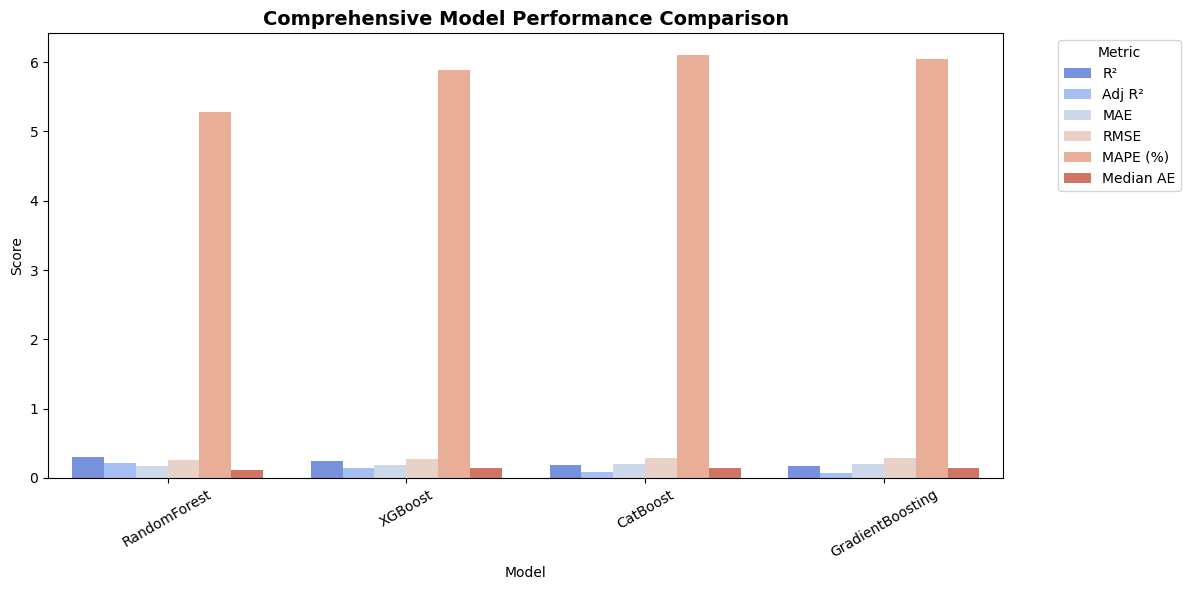


🏆 Best performing model: RandomForest with R² = 0.3060


In [18]:
# ============================================
# 🧠 Step 1: Optional Log Transformation
# ============================================
df_final['ProfitMargin_log'] = np.log1p(df_final['ProfitMargin'] - df_final['ProfitMargin'].min() + 1)
target = 'ProfitMargin_log'

# ============================================
# ⚙️ Step 2: Feature setup (including interaction terms)
# ============================================
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# ============================================
# 🧩 Step 2: Preprocessing + Interaction Terms
# ============================================
# 仅对关键数值列做二阶交互，减少特征爆炸
poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']

numeric_transformer = ColumnTransformer([
    ('poly', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('scaler', StandardScaler())
    ]), poly_cols),
    ('rest', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), [c for c in numeric_cols if c not in poly_cols])
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# ============================================
# 🤖 Step 3: Models and Bayesian Search Spaces
# ============================================
models = {
    "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
        'regressor__n_estimators': Integer(200, 500),
        'regressor__max_depth': Integer(5, 15),
        'regressor__min_samples_split': Integer(2, 8),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'regressor__subsample': Real(0.6, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
        'regressor__iterations': Integer(200, 400),
        'regressor__depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    })
}

# ============================================
# 🔍 Step 4: Cross-Validation + Bayesian Optimization
# ============================================
cv = KFold(n_splits=5, shuffle=True, random_state=666)
results = []

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Optimizing {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=10,  # 减少迭代次数，加快速度
        cv=cv,
        scoring='r2',
        n_jobs=-1,
        random_state=666,
        verbose=1
    )

    opt.fit(X_train, y_train)
    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_test)

    n, p = X_test.shape
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, p)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    medae = median_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "R²": r2,
        "Adj R²": adj_r2,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae
    })

# ============================================
# 📊 Step 5: Results Summary + Visualization
# ============================================
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n✅ Model Performance Summary:")
print(results_df)

melted = results_df.melt(id_vars='Model', 
                         value_vars=['R²', 'Adj R²', 'MAE', 'RMSE', 'MAPE (%)', 'Median AE'],
                         var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# 🏆 Step 6: Identify Best Model
# ============================================
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['R²']:.4f}")



===== 训练行业: Retail =====

🔹 Optimizing RandomForest for Retail ...

🔹 Optimizing GradientBoosting for Retail ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.11737639798438339, np.int64(5), np.int64(367)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.12477284548245995, np.int64(3), np.int64(255)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.05951690099948537, np.int64(5), np.int64(398)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.18680773721285768, np.int64(3), np.int64(280)]
  warnings.warn(
d:\Anaco


🔹 Optimizing XGBoost for Retail ...

🔹 Optimizing CatBoost for Retail ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(5), np.int64(200), 0.2] before, using random point [np.int64(6), np.int64(239), 0.029623483944035172]
  warnings.warn(



===== 训练行业: Transportation =====

🔹 Optimizing RandomForest for Transportation ...

🔹 Optimizing GradientBoosting for Transportation ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.170977897089103, np.int64(8), np.int64(312)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.11737639798438339, np.int64(5), np.int64(367)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.03319365748661447, np.int64(3), np.int64(333)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.12477284548245995, np.int64(3), np.int64(255)]
  warnings.warn(
d:\Anacond


🔹 Optimizing XGBoost for Transportation ...

🔹 Optimizing CatBoost for Transportation ...

===== 训练行业: Technology =====

🔹 Optimizing RandomForest for Technology ...

🔹 Optimizing GradientBoosting for Technology ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.170977897089103, np.int64(8), np.int64(312)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.11737639798438339, np.int64(5), np.int64(367)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.03319365748661447, np.int64(3), np.int64(333)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.18680773721285768, np.int64(3), np.int64(280)]
  warnings.warn(
d:\Anacond


🔹 Optimizing XGBoost for Technology ...

🔹 Optimizing CatBoost for Technology ...

===== 训练行业: Finance =====

🔹 Optimizing RandomForest for Finance ...

🔹 Optimizing GradientBoosting for Finance ...

🔹 Optimizing XGBoost for Finance ...

🔹 Optimizing CatBoost for Finance ...

===== 训练行业: Healthcare =====

🔹 Optimizing RandomForest for Healthcare ...

🔹 Optimizing GradientBoosting for Healthcare ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.170977897089103, np.int64(8), np.int64(312)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.11737639798438339, np.int64(5), np.int64(367)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.03319365748661447, np.int64(3), np.int64(333)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.12477284548245995, np.int64(3), np.int64(255)]
  warnings.warn(
d:\Anacond


🔹 Optimizing XGBoost for Healthcare ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200), 0.6] before, using random point [0.19604063923094833, np.int64(7), np.int64(249), 0.9526412170994181]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200), 0.6] before, using random point [0.0955084885668883, np.int64(4), np.int64(256), 0.989381876838026]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(4), np.int64(200), 0.6] before, using random point [0.012515503461656214, np.int64(4), np.int64(337), 0.7773468121694023]
  warnings.warn(



🔹 Optimizing CatBoost for Healthcare ...

===== 训练行业: Energy =====

🔹 Optimizing RandomForest for Energy ...

🔹 Optimizing GradientBoosting for Energy ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.03319365748661447, np.int64(3), np.int64(333)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.12477284548245995, np.int64(3), np.int64(255)]
  warnings.warn(
d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(200)] before, using random point [0.014246711484756463, np.int64(6), np.int64(294)]
  warnings.warn(



🔹 Optimizing XGBoost for Energy ...

🔹 Optimizing CatBoost for Energy ...

===== 训练行业: Consumer Goods =====

🔹 Optimizing RandomForest for Consumer Goods ...

🔹 Optimizing GradientBoosting for Consumer Goods ...

🔹 Optimizing XGBoost for Consumer Goods ...

🔹 Optimizing CatBoost for Consumer Goods ...

===== 训练行业: Utilities =====

🔹 Optimizing RandomForest for Utilities ...

🔹 Optimizing GradientBoosting for Utilities ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.2, np.int64(3), np.int64(200)] before, using random point [0.11737639798438339, np.int64(5), np.int64(367)]
  warnings.warn(



🔹 Optimizing XGBoost for Utilities ...

🔹 Optimizing CatBoost for Utilities ...

===== 训练行业: Manufacturing =====

🔹 Optimizing RandomForest for Manufacturing ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(15), np.int64(2), np.int64(2), np.int64(500)] before, using random point [np.int64(12), np.int64(4), np.int64(2), np.int64(331)]
  warnings.warn(



🔹 Optimizing GradientBoosting for Manufacturing ...


d:\Anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(400)] before, using random point [0.12477284548245995, np.int64(3), np.int64(255)]
  warnings.warn(



🔹 Optimizing XGBoost for Manufacturing ...

🔹 Optimizing CatBoost for Manufacturing ...

✅ 全行业模型性能 Summary:
          Industry             Model  \
9       Technology  GradientBoosting   
29       Utilities  GradientBoosting   
13         Finance  GradientBoosting   
30       Utilities           XGBoost   
14         Finance           XGBoost   
10      Technology           XGBoost   
31       Utilities          CatBoost   
28       Utilities      RandomForest   
12         Finance      RandomForest   
15         Finance          CatBoost   
19      Healthcare          CatBoost   
24  Consumer Goods      RandomForest   
27  Consumer Goods          CatBoost   
16      Healthcare      RandomForest   
18      Healthcare           XGBoost   
25  Consumer Goods  GradientBoosting   
26  Consumer Goods           XGBoost   
8       Technology      RandomForest   
5   Transportation  GradientBoosting   
33   Manufacturing  GradientBoosting   
17      Healthcare  GradientBoosting   
3          

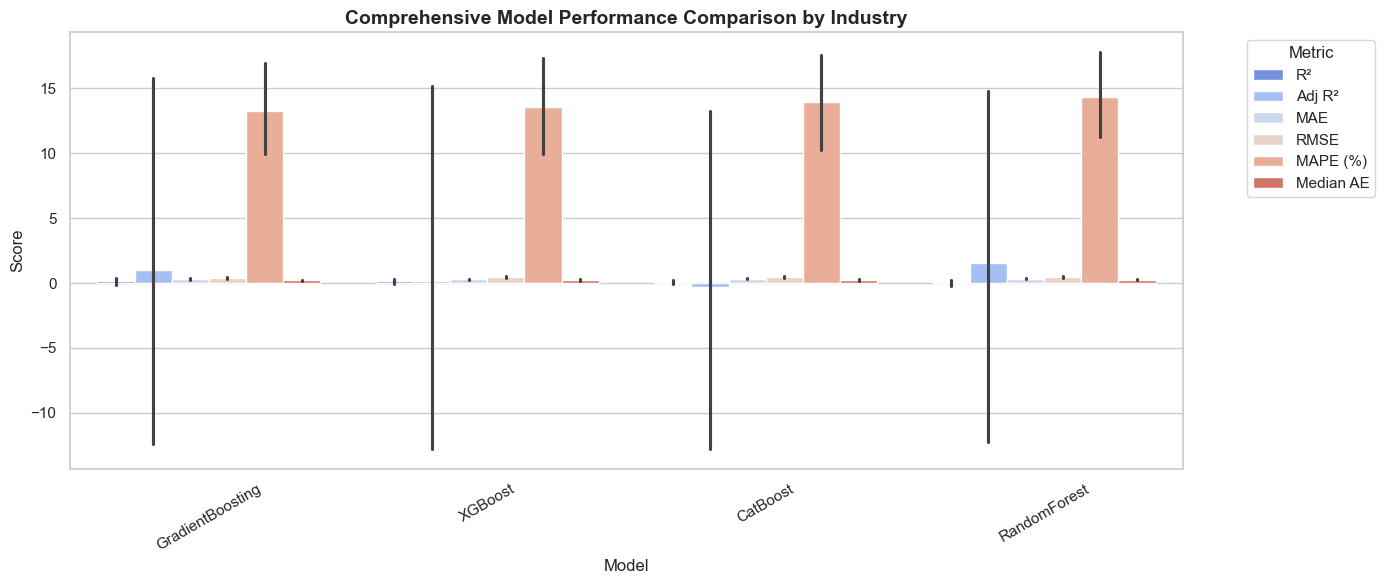


🏆 Best performing model: GradientBoosting in Industry: Technology with R² = 0.5786


In [54]:
# ============================================
# 按行业循环训练
# ============================================
results_all = []

for industry in df_final['Industry'].unique():
    print(f"\n===== 训练行业: {industry} =====")
    df_ind = df_final[df_final['Industry'] == industry].copy()

    # Step 1: log transform
    df_ind['ProfitMargin_log'] = np.log1p(df_ind['ProfitMargin'] - df_ind['ProfitMargin'].min() + 1)
    target = 'ProfitMargin_log'

    # Step 2: features
    X = df_ind[categorical_cols + numeric_cols]
    y = df_ind[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

    # Step 2: preprocessor
    poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']
    numeric_transformer = ColumnTransformer([
        ('poly', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
            ('scaler', StandardScaler())
        ]), poly_cols),
        ('rest', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), [c for c in numeric_cols if c not in poly_cols])
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    # Step 3: 模型字典
    models_local = {
        "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
            'regressor__n_estimators': Integer(200, 500),
            'regressor__max_depth': Integer(5, 15),
            'regressor__min_samples_split': Integer(2, 8),
            'regressor__min_samples_leaf': Integer(1, 5)
        }),
        "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        }),
        "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
            'regressor__subsample': Real(0.6, 1.0)
        }),
        "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
            'regressor__iterations': Integer(200, 400),
            'regressor__depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        })
    }

    # Step 4: CV + Bayesian optimization
    cv = KFold(n_splits=5, shuffle=True, random_state=666)
    results = []

    for name, (regressor, search_space) in models_local.items():
        print(f"\n🔹 Optimizing {name} for {industry} ...")
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ])
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=search_space,
            n_iter=20,
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            random_state=666,
            verbose=0
        )
        opt.fit(X_train, y_train)
        best_model = opt.best_estimator_
        y_pred = best_model.predict(X_test)

        n, p = X_test.shape
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if (n - p - 1) != 0 else np.nan
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
        medae = median_absolute_error(y_test, y_pred)

        results.append({
            "Industry": industry,
            "Model": name,
            "Best Params": opt.best_params_,
            "R²": r2,
            "Adj R²": adj_r2,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape,
            "Median AE": medae
        })

    results_all.extend(results)

# ============================================
# Step 5: Results Summary + Visualization (按行业)
# ============================================
results_df = pd.DataFrame(results_all).sort_values(by="R²", ascending=False)
print("\n✅ 全行业模型性能 Summary:")
print(results_df)

# Melt 数据，用于可视化
value_vars = [col for col in ['R²','Adj R²','MAE','RMSE','MAPE (%)','Median AE'] if col in results_df.columns]

melted = results_df.melt(
    id_vars=['Industry','Model'],
    value_vars=value_vars,
    var_name='Metric',
    value_name='Score'
)

# 可视化：R² / RMSE 等指标按模型 + 行业展示
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison by Industry", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# Step 6: Identify Best Model
# ============================================
best_idx = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_industry = results_df.loc[best_idx, 'Industry']
best_r2 = results_df.loc[best_idx, 'R²']

print(f"\n🏆 Best performing model: {best_model_name} in Industry: {best_industry} with R² = {best_r2:.4f}")

In [19]:
# ============================================
# 按 Industry 分组的训练（使用 GroupKFold）
# 保留 Step 1~6 的整体结构，但把 CV 换成 GroupKFold
# ============================================

from sklearn.model_selection import GroupKFold, GroupShuffleSplit

results_all = []

# ---- Step 1: 全量做目标变换（同你的原始逻辑） ----
df_final['ProfitMargin_log'] = np.log1p(df_final['ProfitMargin'] - df_final['ProfitMargin'].min() + 1)
target = 'ProfitMargin_log'

# ---- 可选：用 GroupShuffleSplit 做一次 train/test（方案 B）
# 如果你想确保 train/test 没有相同行业重复（行业完全隔离），取消注释下面两行并注释掉下面的 train_test_split 行
# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=666)
# train_idx, test_idx = next(gss.split(df_final, groups=df_final['Industry'])); X_train = df_final.iloc[train_idx]; X_test = df_final.iloc[test_idx]

# 这里我们仍使用常规的 train_test_split 用于最终 hold-out 测试（你也可以使用 GroupShuffleSplit 如上）
X = df_final[categorical_cols + numeric_cols]
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# ---- Step 2: Preprocessing (保持你原来的细节) ----
poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']
numeric_transformer = ColumnTransformer([
    ('poly', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('scaler', StandardScaler())
    ]), poly_cols),
    ('rest', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), [c for c in numeric_cols if c not in poly_cols])
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# ---- Step 3: Models (保持你的模型池) ----
models_local = {
    "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
        'regressor__n_estimators': Integer(200, 500),
        'regressor__max_depth': Integer(5, 15),
        'regressor__min_samples_split': Integer(2, 8),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'regressor__subsample': Real(0.6, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
        'regressor__iterations': Integer(200, 400),
        'regressor__depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    })
}

# ---- Step 4: 用 GroupKFold 作为 CV（方案 A，推荐） ----
# GroupKFold 确保同一 industry 的样本不会横跨训练/验证折
group_cv = GroupKFold(n_splits=5)

# 在调用 BayesSearchCV.fit 时，需要把 groups 参数传入（这里使用训练集的 Industry 列作为 groups）
groups_train = X_train['Industry'] if 'Industry' in X_train.columns else df_final.loc[X_train.index, 'Industry']

cv = group_cv  # 传给 BayesSearchCV

for name, (regressor, search_space) in models_local.items():
    print(f"\n🔹 Optimizing {name} with GroupKFold CV...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=15,            # 可适当增加以提高性能（如果时间允许）
        cv=cv,
        scoring='r2',
        n_jobs=1,             # 推荐1以避免线程争用（特别是模型本身也会并行）
        random_state=666,
        verbose=1
    )

    # 关键：把 groups 传给 fit，这样 GroupKFold 才能按 industry 分组
    opt.fit(X_train, y_train, groups=groups_train)

    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_test)

    # 计算指标（与原代码保持一致；注意 adjusted R2 的安全判断）
    n, p = X_test.shape
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if (n - p - 1) != 0 else np.nan
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
    medae = median_absolute_error(y_test, y_pred)

    results_all.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "R²": r2,
        "Adj R²": adj_r2,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae
    })

# ---- Step 5 & 6: Summary & pick best ----
results_df = pd.DataFrame(results_all).sort_values(by="R²", ascending=False)
print("\n✅ Model Performance Summary (GroupKFold):")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['R²']:.4f}")



🔹 Optimizing RandomForest with GroupKFold CV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

🔹 Optimizing GradientBoosting with GroupKFold CV...
Fitting 5 fol


===== 训练行业: Retail =====

🔹 Optimizing RandomForest for Retail ...

🔹 Optimizing GradientBoosting for Retail ...

🔹 Optimizing XGBoost for Retail ...

🔹 Optimizing CatBoost for Retail ...

===== 训练行业: Transportation =====

🔹 Optimizing RandomForest for Transportation ...

🔹 Optimizing GradientBoosting for Transportation ...

🔹 Optimizing XGBoost for Transportation ...

🔹 Optimizing CatBoost for Transportation ...

===== 训练行业: Technology =====

🔹 Optimizing RandomForest for Technology ...

🔹 Optimizing GradientBoosting for Technology ...

🔹 Optimizing XGBoost for Technology ...

🔹 Optimizing CatBoost for Technology ...

===== 训练行业: Finance =====

🔹 Optimizing RandomForest for Finance ...

🔹 Optimizing GradientBoosting for Finance ...

🔹 Optimizing XGBoost for Finance ...

🔹 Optimizing CatBoost for Finance ...

===== 训练行业: Healthcare =====

🔹 Optimizing RandomForest for Healthcare ...

🔹 Optimizing GradientBoosting for Healthcare ...

🔹 Optimizing XGBoost for Healthcare ...

🔹 Optimizin

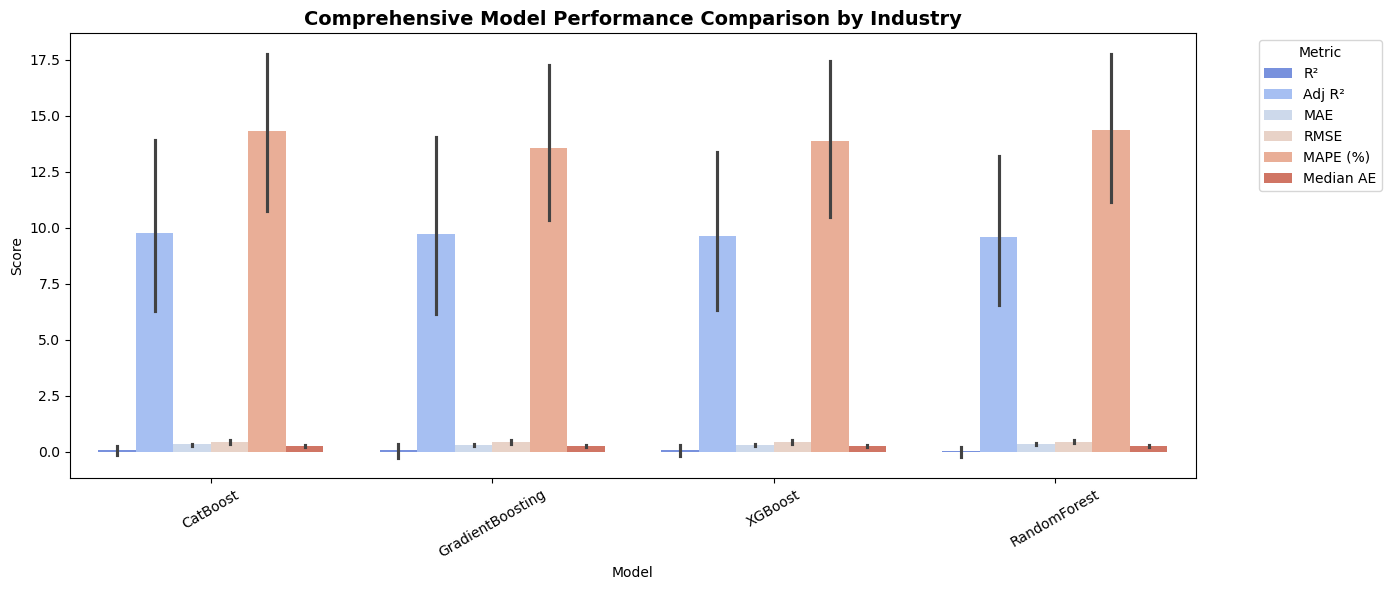


🏆 Best performing model: CatBoost in Industry: Utilities with R² = 0.6322


In [21]:
# ============================================
# Step 0: 导入必要库
# ============================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# Step 1: 按行业循环训练 + 分箱
# ============================================
results_all = []

# 指定需要分箱的关键连续列
bin_cols = ['Revenue', 'ESG_Overall', 'MarketCap']
n_bins = 5  # 分为 5 个箱，可调整

for industry in df_final['Industry'].unique():
    print(f"\n===== 训练行业: {industry} =====")
    df_ind = df_final[df_final['Industry'] == industry].copy()

    # Step 1a: log transform
    df_ind['ProfitMargin_log'] = np.log1p(df_ind['ProfitMargin'] - df_ind['ProfitMargin'].min() + 1)
    target = 'ProfitMargin_log'

    # Step 1b: 分箱处理并生成新列
    for col in bin_cols:
        kb = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
        df_ind[f'{col}_bin'] = kb.fit_transform(df_ind[[col]]).astype(int)

    # Step 2: 特征选择
    categorical_cols_extended = categorical_cols + [f'{col}_bin' for col in bin_cols]
    X = df_ind[categorical_cols_extended + numeric_cols]
    y = df_ind[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

    # Step 3: Preprocessing
    poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']
    numeric_transformer = ColumnTransformer([
        ('poly', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
            ('scaler', StandardScaler())
        ]), poly_cols),
        ('rest', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), [c for c in numeric_cols if c not in poly_cols])
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols_extended)
    ])

    # Step 4: 模型字典
    models_local = {
        "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
            'regressor__n_estimators': Integer(200, 500),
            'regressor__max_depth': Integer(5, 15),
            'regressor__min_samples_split': Integer(2, 8),
            'regressor__min_samples_leaf': Integer(1, 5)
        }),
        "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        }),
        "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
            'regressor__subsample': Real(0.6, 1.0)
        }),
        "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
            'regressor__iterations': Integer(200, 400),
            'regressor__depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        })
    }

    # Step 4b: CV + Bayesian Optimization
    cv = KFold(n_splits=5, shuffle=True, random_state=666)
    results = []

    for name, (regressor, search_space) in models_local.items():
        print(f"\n🔹 Optimizing {name} for {industry} ...")
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ])
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=search_space,
            n_iter=10,
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            random_state=666,
            verbose=0
        )
        opt.fit(X_train, y_train)
        best_model = opt.best_estimator_
        y_pred = best_model.predict(X_test)

        n, p = X_test.shape
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if (n - p - 1) != 0 else np.nan
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
        medae = median_absolute_error(y_test, y_pred)

        results.append({
            "Industry": industry,
            "Model": name,
            "Best Params": opt.best_params_,
            "R²": r2,
            "Adj R²": adj_r2,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape,
            "Median AE": medae
        })

    results_all.extend(results)

# ============================================
# Step 5: Results Summary + Visualization
# ============================================
results_df = pd.DataFrame(results_all).sort_values(by="R²", ascending=False)
print("\n✅ 全行业模型性能 Summary:")
print(results_df)

value_vars = [col for col in ['R²','Adj R²','MAE','RMSE','MAPE (%)','Median AE'] if col in results_df.columns]
melted = results_df.melt(id_vars=['Industry','Model'], value_vars=value_vars, var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison by Industry", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# Step 6: Identify Best Model
# ============================================
best_idx = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_industry = results_df.loc[best_idx, 'Industry']
best_r2 = results_df.loc[best_idx, 'R²']

print(f"\n🏆 Best performing model: {best_model_name} in Industry: {best_industry} with R² = {best_r2:.4f}")
